# Probabilidad y Estadística (C)

**2019 - 2doC**

---

> # Trabajo Práctico:
> # *Ley de los Grandes Números y Teorema Central del Límite.*


**Resolver los siguientes items utlizando R.**

> 1. Para cada $n$ entre $1$ y $3000$:
>
>   generar observaciones $x_1, \dots , x_n$ de $X_1, \dots , X_n$ v.a. i.i.d. con distribución $\varepsilon(\lambda)$, con $\lambda$ a elección y obtener
>
>   $$\bar x_n = \frac 1 n \sum_{i=1}^n x_i $$
>
>   es decir, una observación $\bar x_n$ de
>
>   $$\bar X_n = \frac 1 n \sum_{i=1}^n X_i$$

> Realizar un gráfico de $n$ vs $\bar x_n$. ¿Qué observa? ¿A qué se debe?

Sea:

$$X_i \sim \varepsilon(\lambda)$$

$E[X_i] = \frac 1 \lambda$

$V[X_i] = \frac 1 {\lambda^2}$

Elijo $\lambda = 4$ para todos los experimentos

In [396]:
lambda <- 4.0

#### Exponencial($\lambda$)

[wiki: Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

* ***PDF***:
$$f_X(x) = \lambda e^{-\lambda x}$$

* ***CDF***:
$$F_X(x) = 1 - \lambda e^{-\lambda x}$$

In [397]:
exponencial_pdf <- function(lambda, x) {
   return ( lambda * exp( -lambda * x ) )
}

In [398]:
grilla_exponencial <- function(lambda, desde=0, hasta=2, step=0.1) { 
    xs <- seq(desde, hasta, step)
    ys <- numeric()
    for (i in 1:length(xs)){
        ys[i] <- exponencial_pdf(lambda, xs[i])
    }
    
    valores <- data.frame (
        xs=xs,
        ys=ys
    )
    return (valores)
}

In [399]:
head(grilla_exponencial(lambda=4))

xs,ys
"0,0","4,0000000"
"0,1","2,6812802"
"0,2","1,7973159"
"0,3","1,2047768"
"0,4","0,8075861"
"0,5","0,5413411"


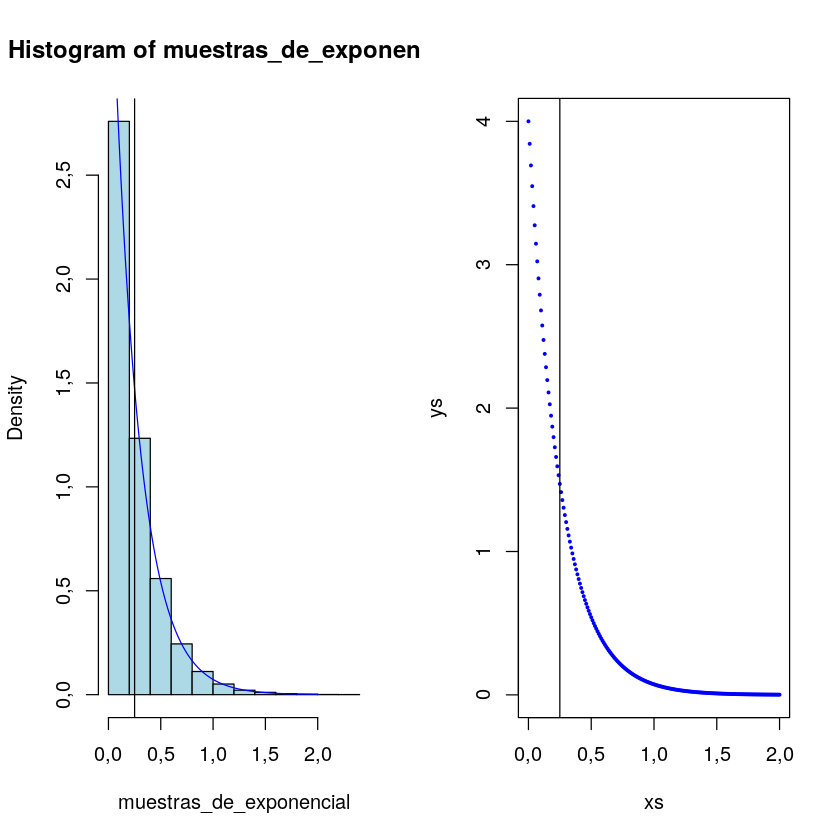

In [400]:
par(mfrow=c(1,2))
muestras_de_exponencial <- rexp(30000, lambda)

esperanza_exp <- 1/lambda

hist(muestras_de_exponencial, freq=FALSE, col="lightblue")
lines(grilla_exponencial(lambda, step=0.01), col="blue")
abline(v=esperanza_exp)


plot(grilla_exponencial(lambda, step=0.01), pch=19, cex=0.3, col="blue")
abline(v=esperanza_exp)

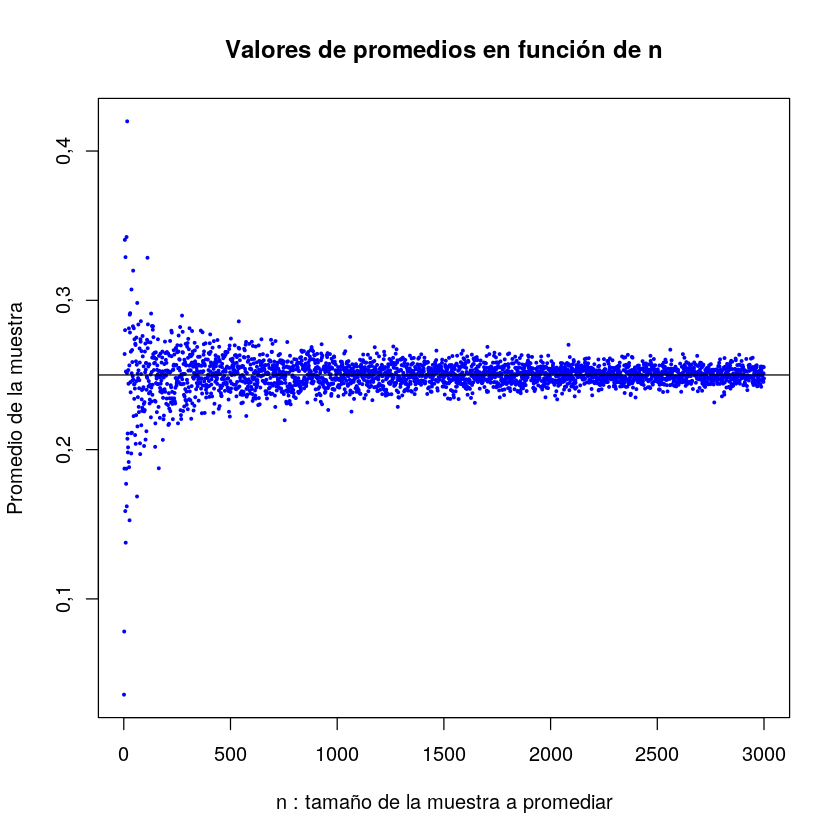

In [401]:
max_n  <- 3000
promedios <- numeric(max_n)
for (i in 1:max_n) {
    promedios[i] <- sum(rexp(i, lambda))/i
}
#plot(c(1:max_n), promedios, cex=2, pch=19, col="darkgray")
plot(c(1:max_n), promedios, cex=0.3, pch=19, col="blue", xlab="", ylab="")
title(main="Valores de promedios en función de n", xlab="n : tamaño de la muestra a promediar",
     ylab="Promedio de la muestra")
#?plotmath # plot con latex
abline(h=1/lambda, cex=0.7)


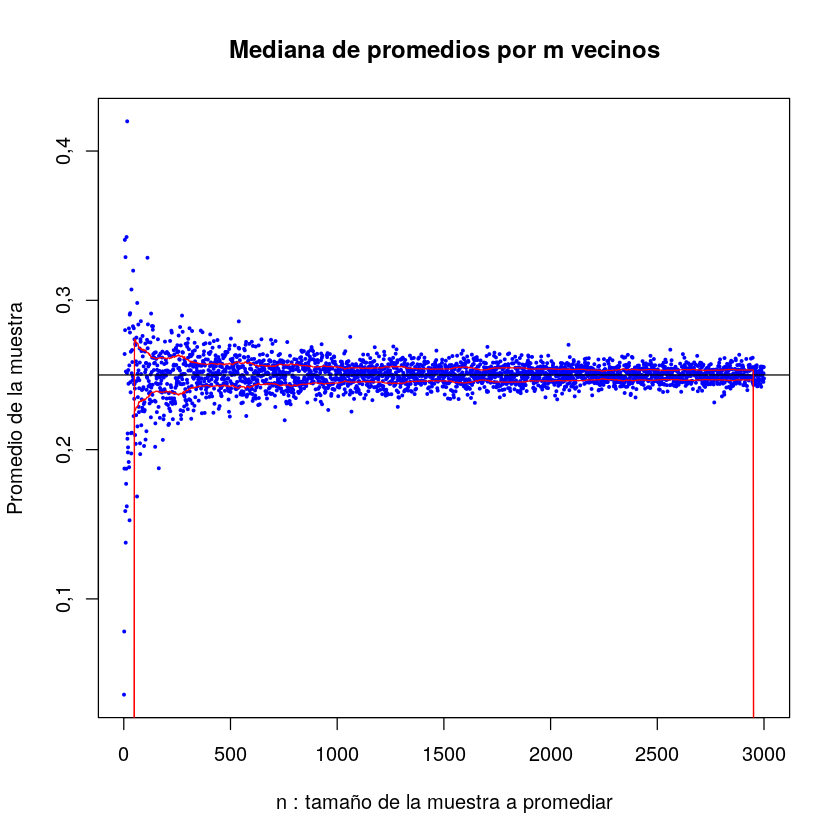

In [402]:
plot(c(1:max_n), promedios, cex=0.3, pch=19, col="blue", xlab="", ylab="")
title(main="Mediana de promedios por m vecinos", xlab="n : tamaño de la muestra a promediar",
     ylab="Promedio de la muestra")
#?plotmath # plot con latex
abline(h=1/lambda, cex=0.7)
# Flasheada
n_veci <- 50
prom_vecinos_sup <- numeric(max_n)
prom_vecinos_inf <- numeric(max_n)
rango_reduc <- n_veci:(max_n-n_veci) # Deja afuera n_vecinos 
for(i in rango_reduc){
    vecinos <- (((i-n_veci+1):(i+n_veci)))
    prom_vecinos_sup[i] <- median( abs(promedios[vecinos]-1/lambda)) + 1/lambda
    prom_vecinos_inf[i] <- median(-abs(promedios[vecinos]-1/lambda)) + 1/lambda
}
lines(c(1:max_n), prom_vecinos_sup, cex=2, pch=19, col="red")
lines(c(1:max_n), prom_vecinos_inf, cex=2, pch=19, col="red")


>  ¿Qué observa? ¿A qué se debe?

Se observa que los promedios que se obtienen con distintos $n$ se concentran en la esperanza $E[X_i]$ de la variable aleatoria de la que provienen las muestras:

$$X_i \sim \varepsilon(\lambda=4)$$

Cuya esperanza es

$$E[X_i] = \frac 1 \lambda = \frac 1 4$$

Ésto se debe a la [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros), que demuestra que cualquier variable aleatoria con varianza finita, **convergerá** (en el límite) a su esperanza al promediarse $n$ realizaciones.

> 2. Para apreciar aún un poco más la **Ley de los Grandes Números**, realizar el siguiente experimento:
>
>   **(a)** Considerar dos observaciones $x_1$ y $x_2$ de variables aleatorias $X_1$ y $X_2$ independientes con distribución $\varepsilon(\lambda)$ y **guardar el promedio de ambas**, es decir, $\bar x_2$.
>   
>   Repetir 1000 veces y a partir de los valores obtenidos realizar un ***histograma, un boxplot y un QQ-plot***.
>
>   ¿Qué características tienen?


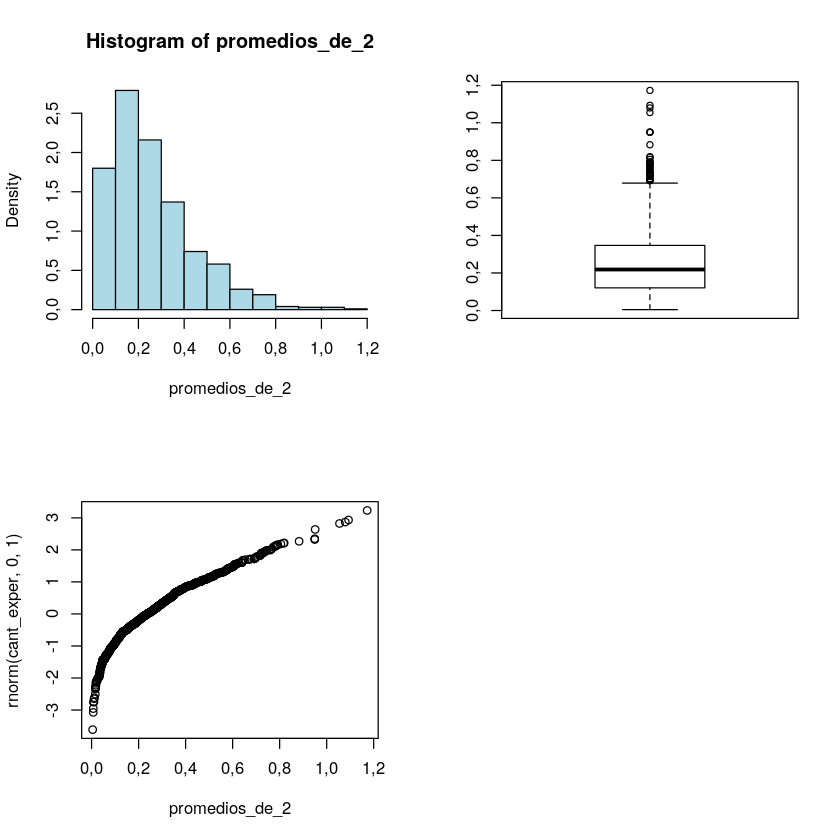

In [403]:
par(mfrow=c(2,2))

lambda <- 4
cant_exper <- 1000
promedios_de_2 <- numeric(cant_exper)
for(i in 1:cant_exper) {
    promedios_de_2[i] <- sum(rexp(2,lambda))/2
}
hist(promedios_de_2, freq=FALSE, col="lightblue")
boxplot(promedios_de_2)
qqplot(promedios_de_2, rnorm(cant_exper, 0,1))

>   **(b)** Aumentar a **cinco** las **variables promediadas**, es decir, considerar ahora **n = 5** observaciones de variables aleatorias independientes con la misma distribución del ítem anterior y guardar $\bar x_5$.
>
>   Repetir 1000 veces y realizar un histograma, un boxplot y un QQ-plot para los valores obtenidos.
>
>   Comparar con los obtenidos en el ítem anterior. ¿Qué se observa?

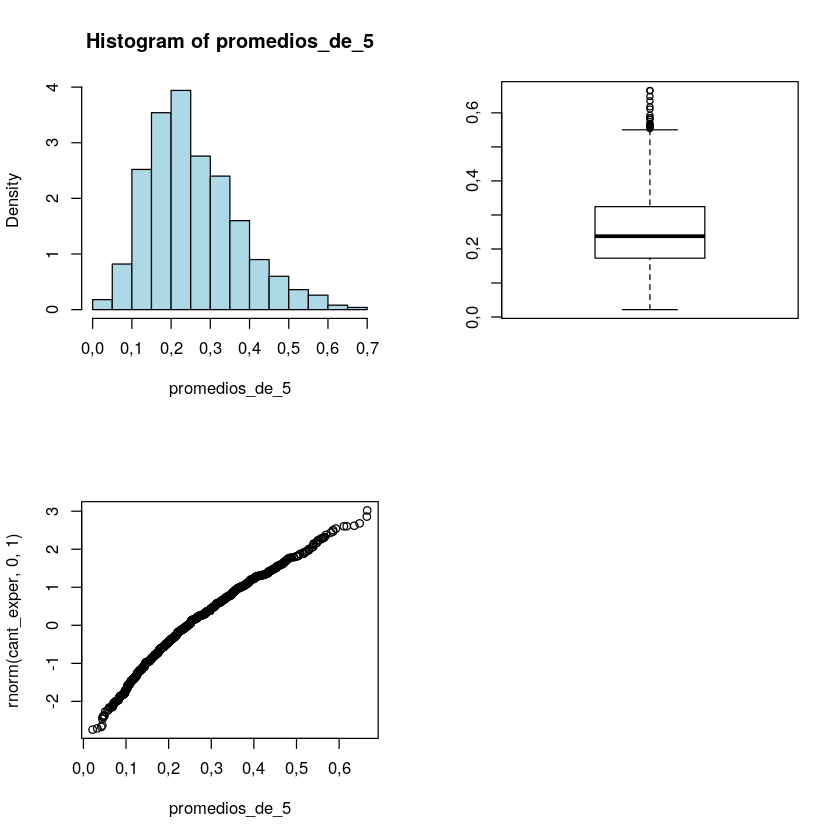

In [404]:
# 2b)
par(mfrow=c(2,2))

n <- 5
promedios_de_5 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_5[i] <- sum(rexp(n, lambda))/n
}
hist(promedios_de_5, freq=FALSE, col="lightblue")
boxplot(promedios_de_5)
qqplot(promedios_de_5, rnorm(cant_exper, 0,1))

>   **(c)** Aumentar a n = 30 el número de observaciones de v.a. i.i.d. y repetir el ítem anterior.
>
>   Repetir todo con n = 500.

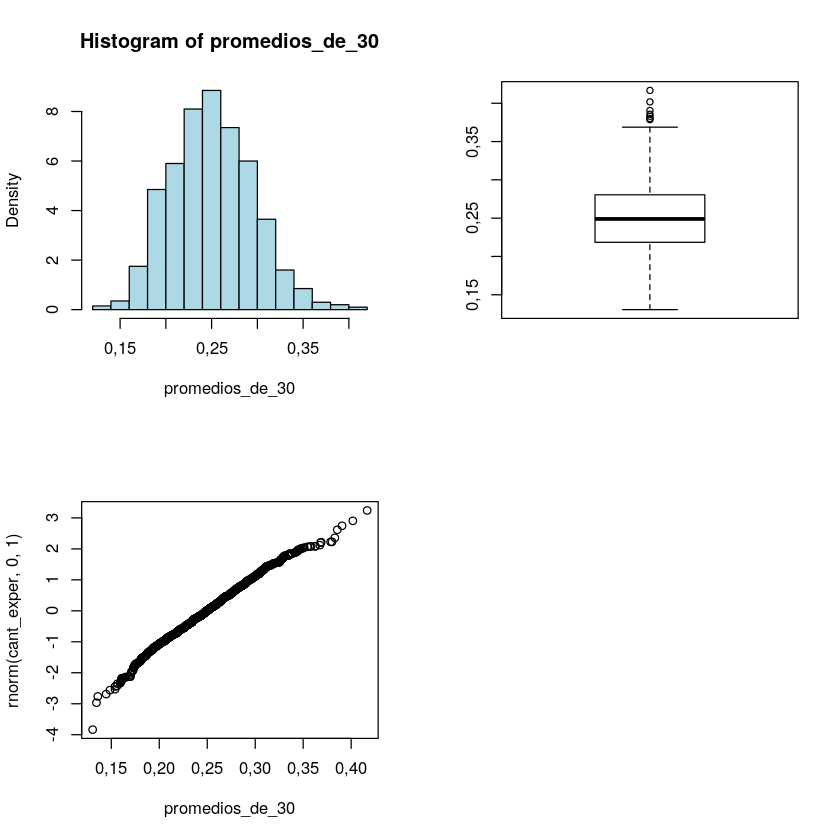

In [405]:
par(mfrow=c(2,2))

n <- 30
promedios_de_30 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_30[i] <- sum(rexp(n,lambda))/n
}
hist(promedios_de_30, freq=FALSE, col="lightblue")
boxplot(promedios_de_30)
qqplot(promedios_de_30, rnorm(cant_exper, 0,1))



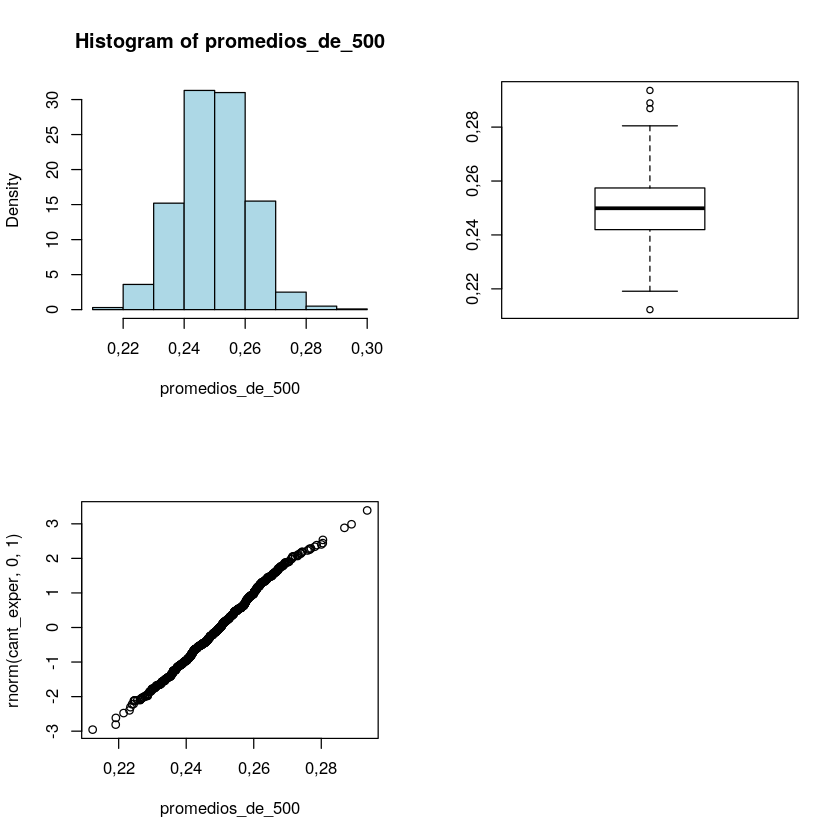

In [406]:
par(mfrow=c(2,2))

n <- 500
promedios_de_500 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_500[i] <- sum(rexp(n, lambda))/n
}
hist(promedios_de_500, freq=FALSE, col="lightblue")
boxplot(promedios_de_500)
qqplot(promedios_de_500, rnorm(cant_exper, 0,1))

>   **(d)** Realizar ***boxplots, histogramas y qqplots*** de los 4 conjuntos de datos en el mismo gráfico.
>
>   ¿Qué pasaría si se siguiera aumentando el tamaño de la muestra?

---

>3. El **Teorema Central del Límite** nos dice que cuando hacemos la siguiente transformación con los promedios: 
>
>   $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$
>
>   la **distribución** de esta variable aleatoria se aproxima a la de la normal estándar si $n$ es ***suficientemente grande***.
>
>   Comprobaremos mediante una simulación este resultado.

> **(a)** Realizar la transformación mencionada en los 4 conjuntos de datos del ítem 2. y graficar boxplots paralelos y QQ-plots.

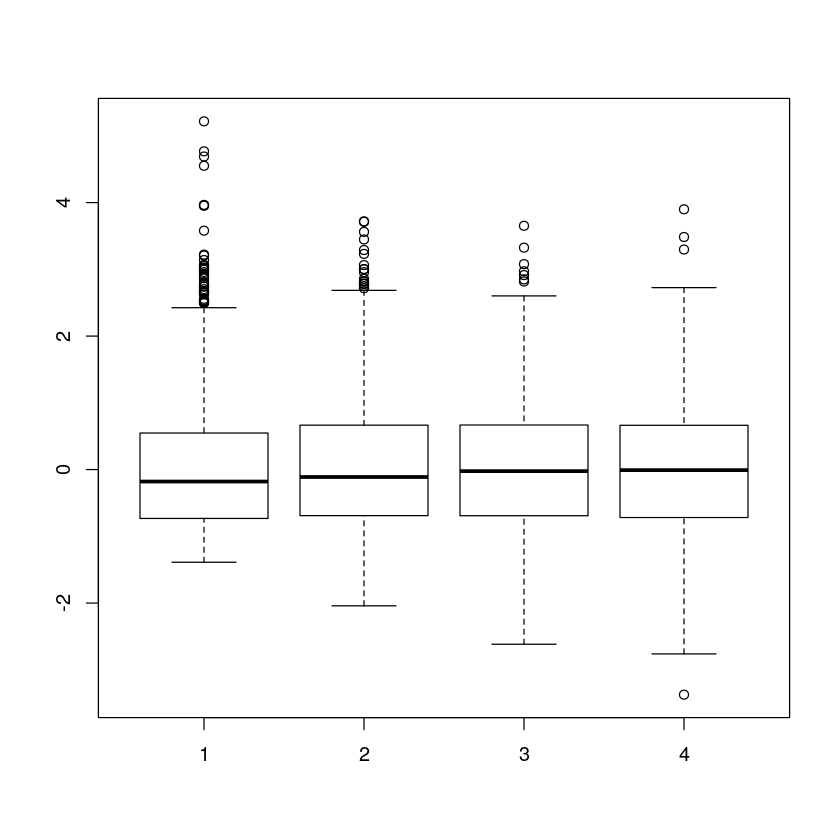

In [407]:
# 3a) Estandarizamos
esperanza <- 1/lambda # Xi ~ Exp(lambda); E[Xi]=1/lambda; V[Xi]=1/lambda^2
transfor_de_2   <- (promedios_de_2 - (1/lambda))   / sqrt((1/lambda^2) / 2)
transfor_de_5   <- (promedios_de_5 - (1/lambda))   / sqrt((1/lambda^2) / 5)
transfor_de_30  <- (promedios_de_30 - (1/lambda))  / sqrt((1/lambda^2) / 30)
transfor_de_500 <- (promedios_de_500 - (1/lambda)) / sqrt((1/lambda^2) / 500)

boxplot(transfor_de_2, transfor_de_5, transfor_de_30, transfor_de_500)



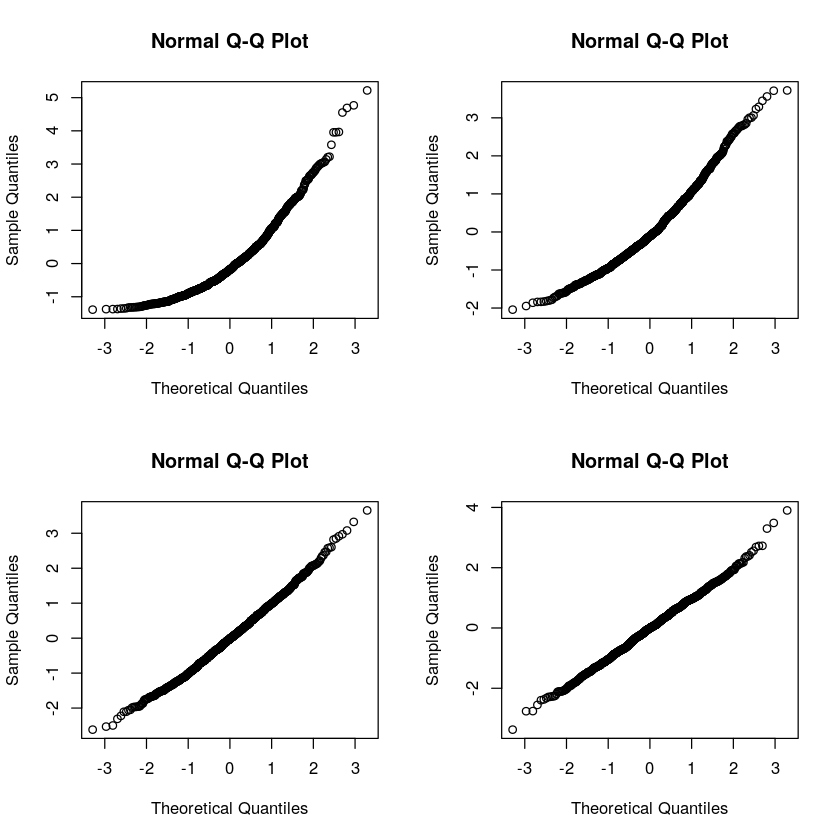

In [408]:
par(mfrow=c(2,2))
qqnorm(transfor_de_2)
qqnorm(transfor_de_5)
qqnorm(transfor_de_30)
qqnorm(transfor_de_500)

>**(b)** Realizar **4 histogramas** y a cada uno de ellos superponerle la **densidad de la normal estándar**.
>
>$Sugerencia$: una vez creado el histograma, utilizar la función `lines(grilla, dnorm(grilla))` con
`grilla` un vector de valores posibles (y consecutivos) para el eje x.

In [409]:
?legend

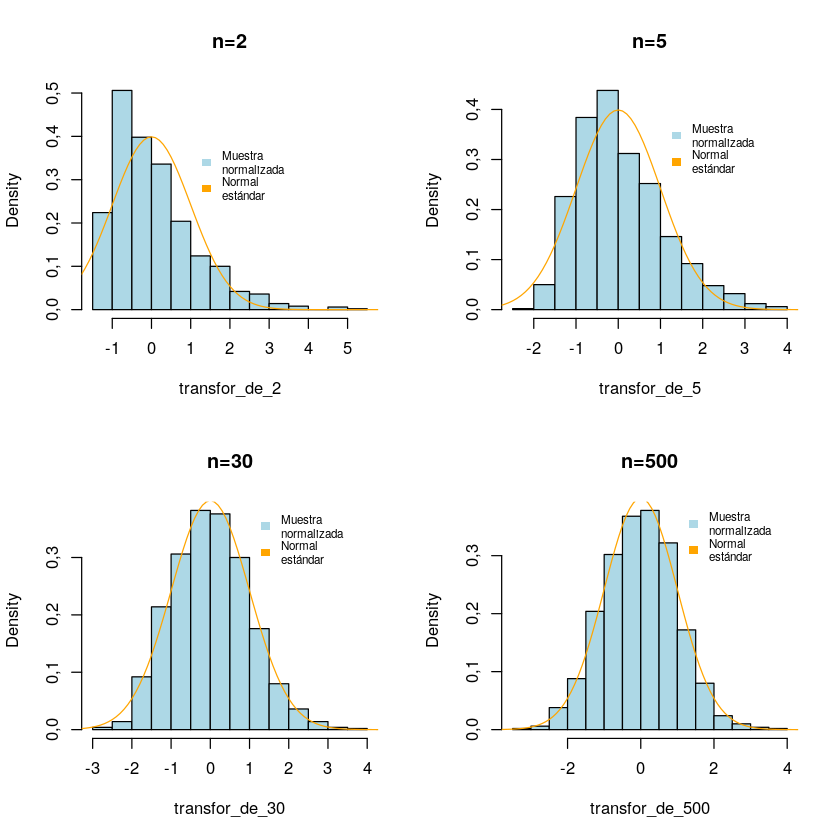

In [414]:
# Grilla de 2x2 plots
par(mfrow = c(2, 2))

# Histograma para promedios de 2
hist(transfor_de_2, freq = FALSE, main = "n=2", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

# Histograma para promedios de 5
hist(transfor_de_5, freq = FALSE, main = "n=5", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

# Histograma para promedios de 30
hist(transfor_de_30, freq = FALSE, main = "n=30", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

# Histograma para promedios de 500
hist(transfor_de_500, freq = FALSE, main = "n=500", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

> **(c)** Explicar los resultados obtenidos.

Observamos cpmo, a pesar de tener variables aleatorias exponenciales con rango entre $0$ y $+\infty$, al normalizar los promedios, obtenemos valores negativos.

**A medida que aumentamos el tamaño de la muestra**, la frecuencia y valores de los promedios obtenidos se asemeja en gran medida a una **distribución Normal estándar**.

> **4.** Repetir los ítems anteriores generando ahora muestras de variables aleatorias independientes con distribución $Bi(n, p)$, con $n=\dots$ y $p=\dots$, y con la distribución de [ley de potencias](https://es.wikipedia.org/wiki/Ley_potencial).

In [132]:
binomial_pdf <- function(n, p, k) {
    return ( choose(n,k) * p^k * (1-p)^(n-k) )
}

In [147]:
grilla_binomial <- function(n, p, desde=0, hasta=n, step=1) { 
    xs <- seq(desde, hasta, step)
    ys <- numeric()
    for (i in 1:length(xs)){
        ys[i] <- binomial_pdf(n, p, xs[i])
    }
    
    valores <- data.frame (
        xs=xs,
        ys=ys
    )
    return (valores)
}

In [148]:
n <- 10
p <- 1/4
head(grilla_binomial(n, p))

xs,ys
0,"0,05631351"
1,"0,18771172"
2,"0,28156757"
3,"0,25028229"
4,"0,14599800"
5,"0,05839920"


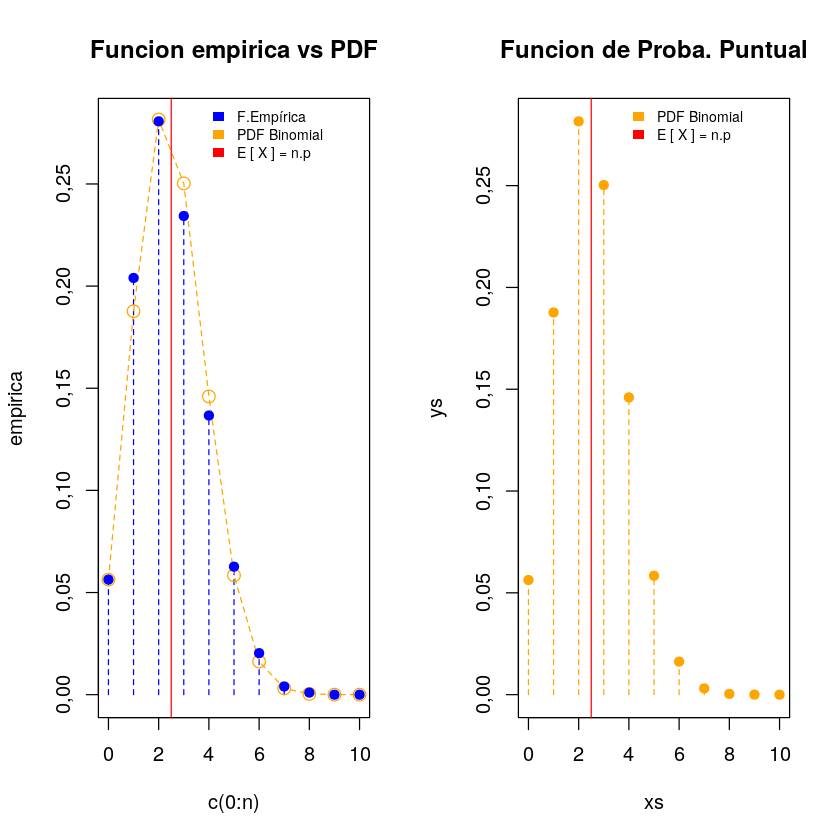

In [357]:
par(mfrow=c(1,2))

esperanza_binomial   <- n * p
n_muestras <- 3000
muestras_de_binomial <- rbinom(n_muestras, size=n, prob=p)
counts <- rep(0, n+1) #vector con ceros de tamaño n+1


for (k in 0:n) {
    # Cuento ocurrencias de cada k (uso 'mascara binaria') en los 30000 experimentos
    counts[k+1] <- sum(c(muestras_de_binomial==k))
}
# Si normalizo las frecuencias, obtengo una aproximacion de la función
# de probabilidad puntual: la Función Empírica
empirica <- counts/n_muestras

plot(x=c(0:n), y=empirica, type="h", col="blue", lty=20,
     main="Funcion empirica vs PDF")

lines(grilla_binomial(n, p), col="orange", lty=20)
points(grilla_binomial(n, p), col="orange", lty=20, pch=1, cex=1.4)
points(x=c(0:n), y=empirica, col="blue", pch=19)

abline(v=esperanza_binomial, col="red")
legend(x = "topright", legend = c("F.Empírica", "PDF Binomial", "E [ X ] = n.p"),
       fill = c("blue","orange", "red"),
       bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

grilla <- grilla_binomial(n,p)
plot(grilla, pch=19, cex=1, col="orange", main="Funcion de Proba. Puntual")
segments(x0=grilla$xs, x1=grilla$xs,
         y0=rep(0, length(grilla$xs)),
         y1=grilla$ys,
         col="orange", lty=20)
abline(v=esperanza_binomial, col="red")
legend(x = "topright", legend = c("PDF Binomial", "E [ X ] = n.p"),
       fill = c("orange","red"),
       bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

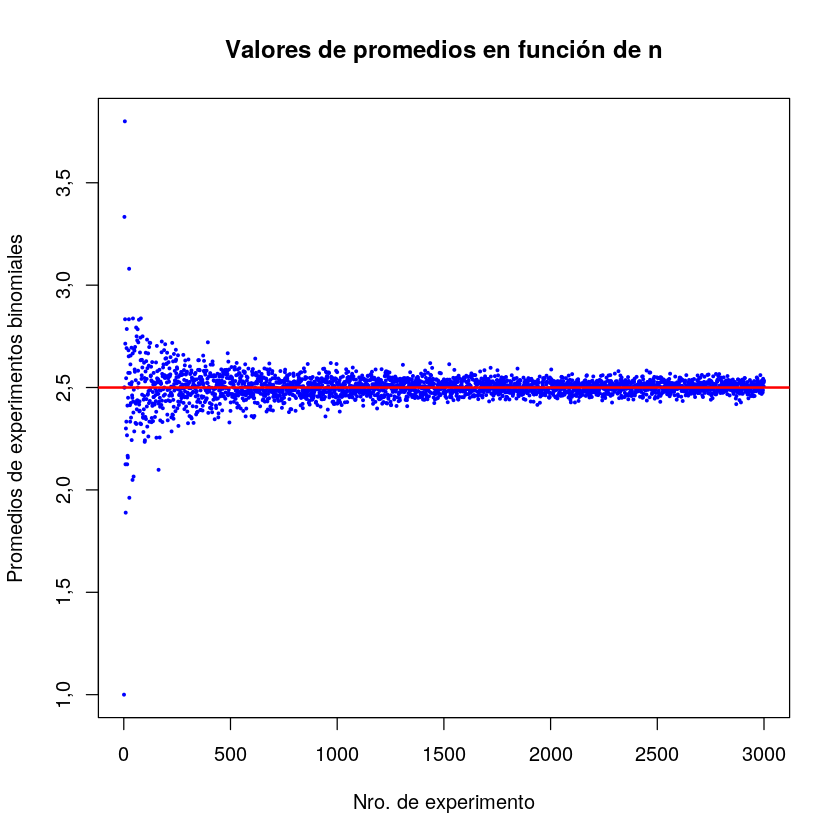

In [384]:
n <- 10
p <- 1/4
max_n  <- 3000
promedios <- rep(0, max_n)
for (i in 1:max_n) {
    promedios[i] <- sum(rbinom(i, size=n, prob=p))/i
}
#plot(c(1:max_n), promedios, cex=2, pch=19, col="darkgray")
plot(c(1:max_n), promedios, cex=0.3, pch=19, col="blue", xlab="", ylab="")
title(main="Valores de promedios en función de n", xlab="Nro. de experimento",
     ylab="Promedios de experimentos binomiales")
#?plotmath # plot con latex
abline(h=n*p, lwd=2,col="red")


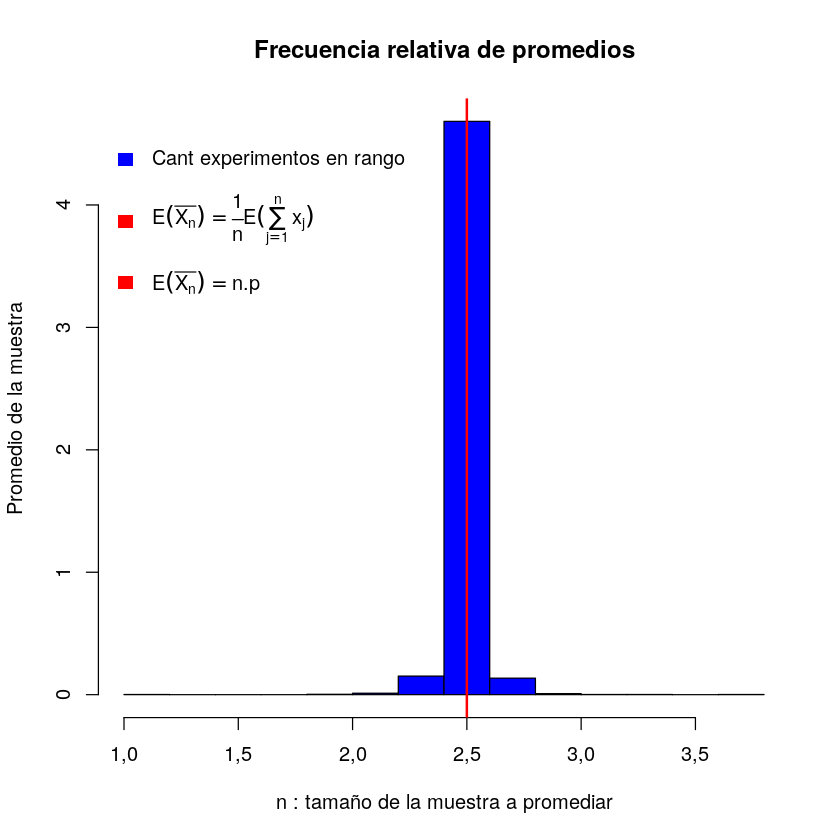

In [386]:
hist(promedios, col="blue", xlab="", ylab="", main="", freq=FALSE)
title(main="Frecuencia relativa de promedios",
      xlab="n : tamaño de la muestra a promediar",
      ylab="Promedio de la muestra")
#?plotmath # plot con latex
abline(v=n*p, lwd=2, col="red")
legend("topleft", bg = NA, border = NA, box.col = NA,
       fill=c("blue","red","red"),
       c("Cant experimentos en rango",
           expression(E(bar(X[n])) == frac(1,n) * E (sum(x[j], j==1, n) )),
         expression(E(bar(X[n])) == n.p)), box.lwd=0)

In [335]:
?plotmath

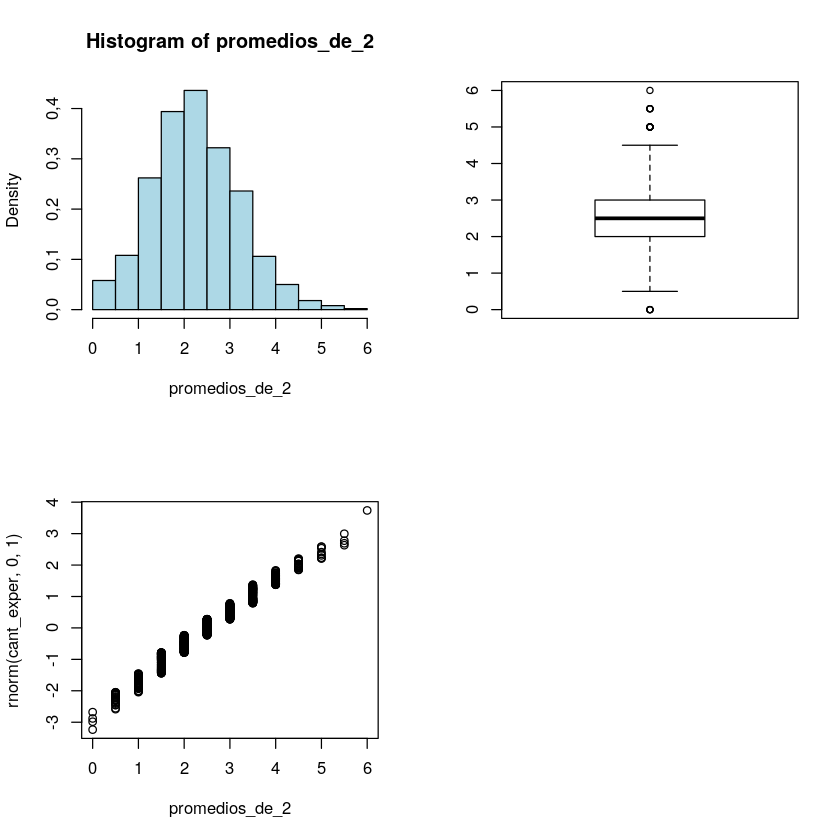

In [387]:
par(mfrow=c(2,2))

n <- 10
p <- 1/4
cant_exper <- 1000
promedios_de_2 <- numeric(cant_exper)
for(i in 1:cant_exper) {
    promedios_de_2[i] <- sum(rbinom(2, size=n, prob=p))/2
}
hist(promedios_de_2, freq=FALSE, col="lightblue")
boxplot(promedios_de_2)
qqplot(promedios_de_2, rnorm(cant_exper, 0,1))

>   **(b)** Aumentar a **cinco** las **variables promediadas**, es decir, considerar ahora **n = 5** observaciones de variables aleatorias independientes con la misma distribución del ítem anterior y guardar $\bar x_5$.
>
>   Repetir 1000 veces y realizar un histograma, un boxplot y un QQ-plot para los valores obtenidos.
>
>   Comparar con los obtenidos en el ítem anterior. ¿Qué se observa?

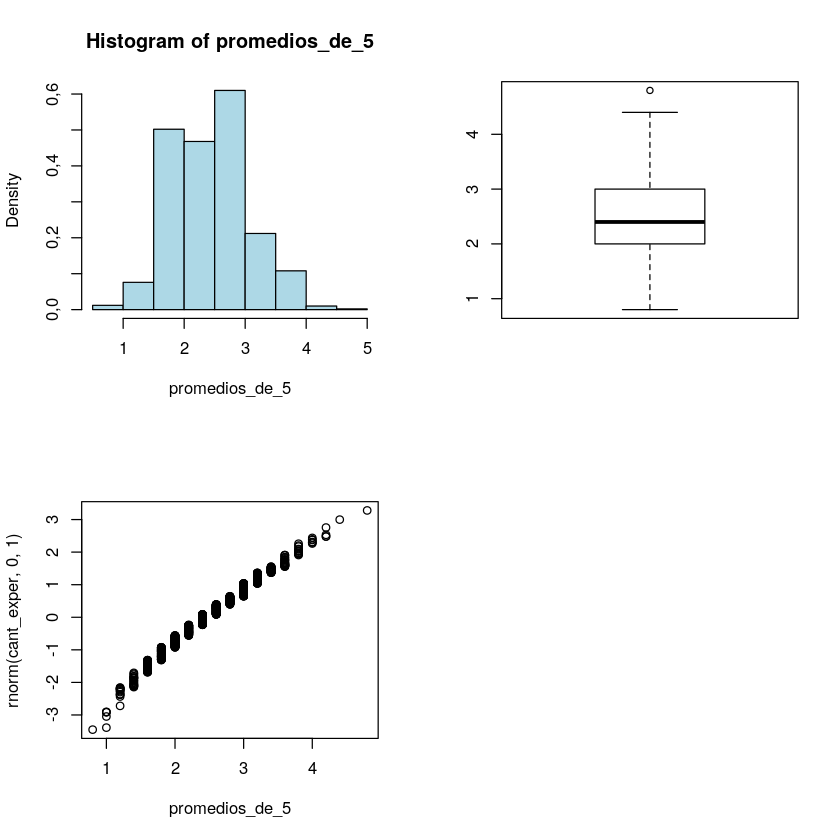

In [389]:
# 2b)
par(mfrow=c(2,2))


promedios_de_5 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_5[i] <- sum(rbinom(5, size=n, prob=p))/5
}
hist(promedios_de_5, freq=FALSE, col="lightblue")
boxplot(promedios_de_5)
qqplot(promedios_de_5, rnorm(cant_exper, 0,1))

>   **(c)** Aumentar a n = 30 el número de observaciones de v.a. i.i.d. y repetir el ítem anterior.
>
>   Repetir todo con n = 500.

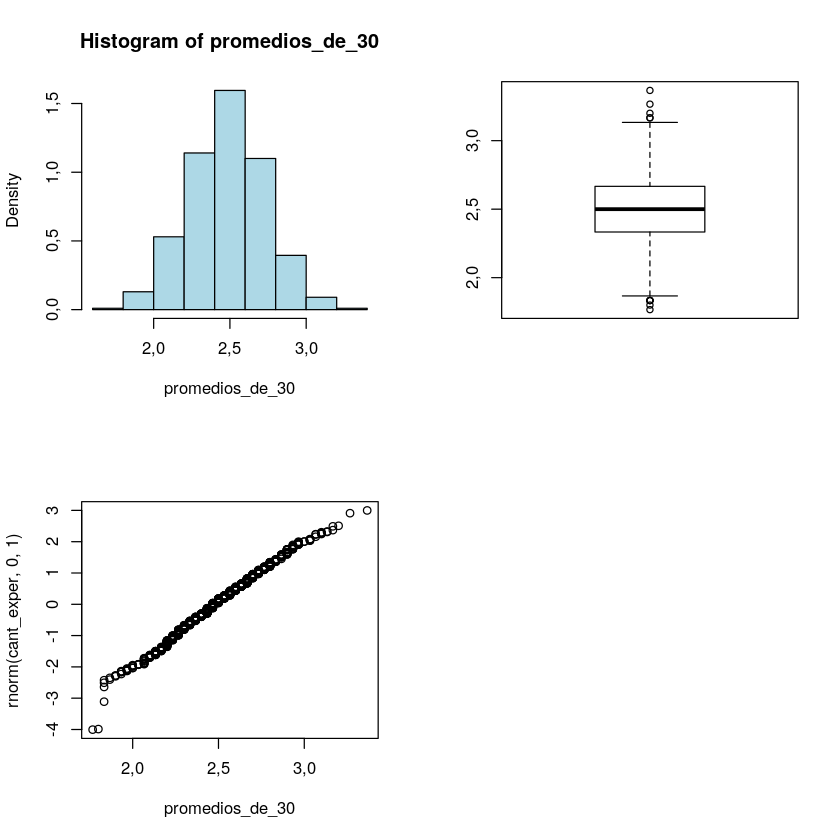

In [390]:
par(mfrow=c(2,2))


promedios_de_30 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_30[i] <- sum(rbinom(30, size=n, prob=p))/30
}
hist(promedios_de_30, freq=FALSE, col="lightblue")
boxplot(promedios_de_30)
qqplot(promedios_de_30, rnorm(cant_exper, 0,1))



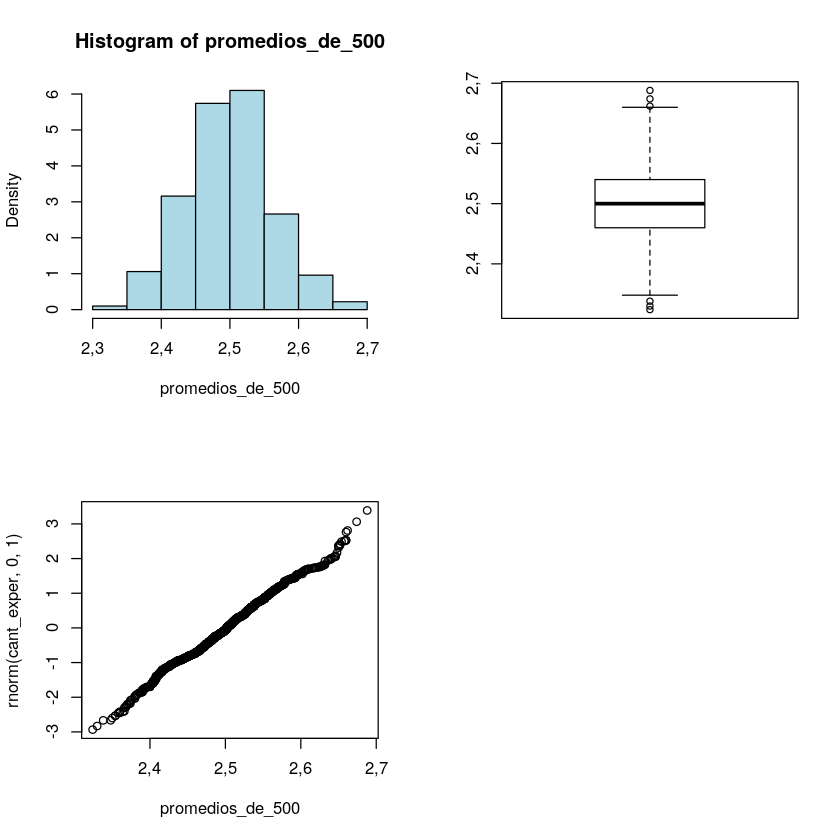

In [391]:
par(mfrow=c(2,2))

promedios_de_500 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_500[i] <- sum(rbinom(500, size=n, prob=p))/500
}
hist(promedios_de_500, freq=FALSE, col="lightblue")
boxplot(promedios_de_500)
qqplot(promedios_de_500, rnorm(cant_exper, 0,1))

>   **(d)** Realizar ***boxplots, histogramas y qqplots*** de los 4 conjuntos de datos en el mismo gráfico.
>
>   ¿Qué pasaría si se siguiera aumentando el tamaño de la muestra?

---

>3. El **Teorema Central del Límite** nos dice que cuando hacemos la siguiente transformación con los promedios: 
>
>   $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$
>
>   la **distribución** de esta variable aleatoria se aproxima a la de la normal estándar si $n$ es ***suficientemente grande***.
>
>   Comprobaremos mediante una simulación este resultado.

> **(a)** Realizar la transformación mencionada en los 4 conjuntos de datos del ítem 2. y graficar boxplots paralelos y QQ-plots.

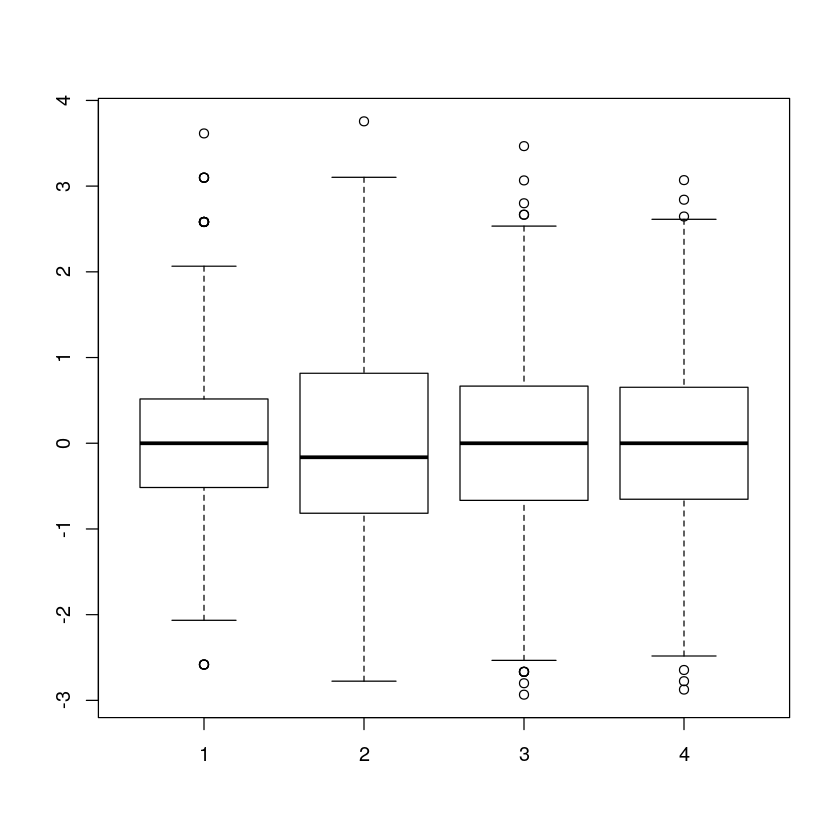

In [392]:
# 3a) Estandarizamos
esperanza <- n*p # Xi ~ Exp(lambda); E[Xi]=1/lambda; V[Xi]=1/lambda^2
transfor_de_2   <- (promedios_de_2   - (n*p)) / sqrt((n*p*(1-p)) / 2)
transfor_de_5   <- (promedios_de_5   - (n*p)) / sqrt((n*p*(1-p)) / 5)
transfor_de_30  <- (promedios_de_30  - (n*p)) / sqrt((n*p*(1-p)) / 30)
transfor_de_500 <- (promedios_de_500 - (n*p)) / sqrt((n*p*(1-p)) / 500)

boxplot(transfor_de_2, transfor_de_5, transfor_de_30, transfor_de_500)



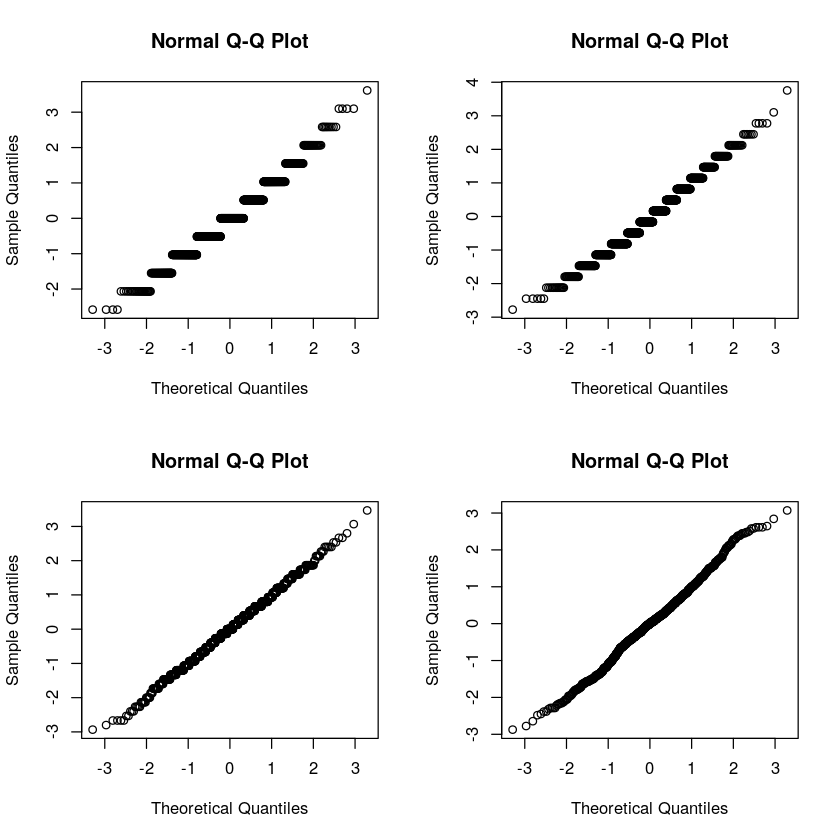

In [393]:
par(mfrow=c(2,2))
qqnorm(transfor_de_2)
qqnorm(transfor_de_5)
qqnorm(transfor_de_30)
qqnorm(transfor_de_500)

>**(b)** Realizar **4 histogramas** y a cada uno de ellos superponerle la **densidad de la normal estándar**.
>
>$Sugerencia$: una vez creado el histograma, utilizar la función `lines(grilla, dnorm(grilla))` con
`grilla` un vector de valores posibles (y consecutivos) para el eje x.

In [46]:
?legend

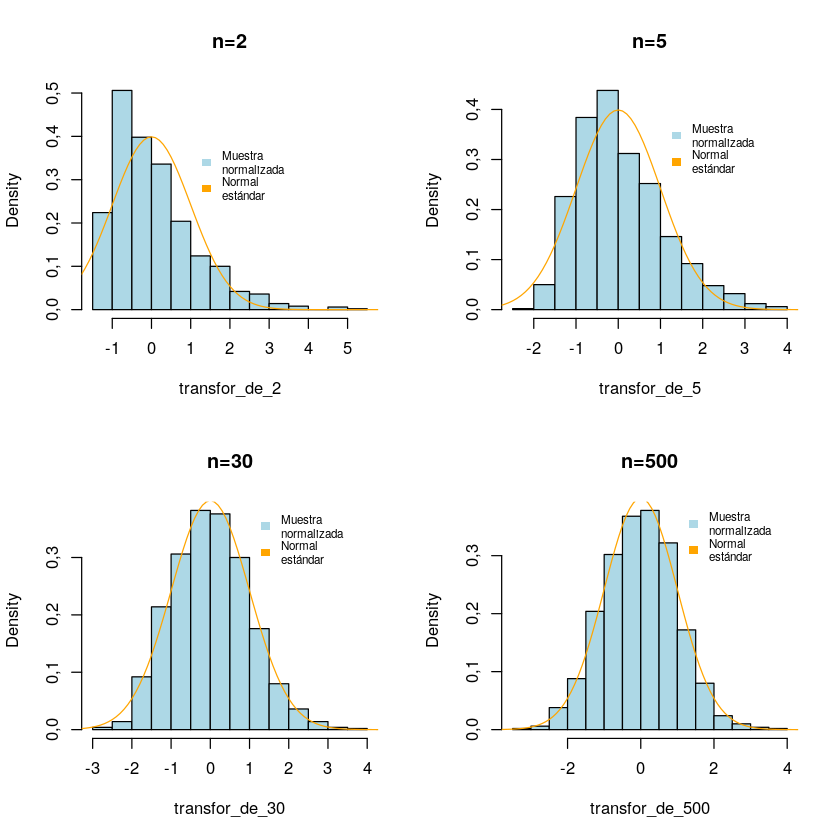

In [415]:
# Grilla de 2x2 plots
par(mfrow = c(2, 2))

# Histograma para promedios de 2
hist(transfor_de_2, freq = FALSE, main = "n=2", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

# Histograma para promedios de 5
hist(transfor_de_5, freq = FALSE, main = "n=5", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

# Histograma para promedios de 30
hist(transfor_de_30, freq = FALSE, main = "n=30", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)

# Histograma para promedios de 500
hist(transfor_de_500, freq = FALSE, main = "n=500", col = "lightblue")
lines(seq(-6, 6, 0.1), dnorm(seq(-6, 6, 0.1)), col = "orange")
legend(x = c(0, 0.4), legend = c("Muestra\nnormalizada", "Normal\nestándar"), fill = c("lightblue", 
    "orange"), bg = NA, border = NA, box.col = NA, text.width = 5, cex = 0.7)